In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/PRIYANUJ BHOWMICK/Downloads/stocks.csv")

# 1. Remove duplicate rows
df = df.drop_duplicates()

# 2. Handle missing values
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
# Forward fill remaining missing values
df = df.fillna(method='ffill')

# 3. Fix data types
df = df.convert_dtypes()

# 4. Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 5. Handle outliers using IQR method for numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# 6. Reset index
df.reset_index(drop=True, inplace=True)

# Final cleaned dataset
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     245 non-null    string 
 1   date       245 non-null    string 
 2   open       245 non-null    Float64
 3   high       245 non-null    Float64
 4   low        245 non-null    Float64
 5   close      245 non-null    Float64
 6   adj_close  245 non-null    Float64
 7   volume     245 non-null    Int64  
dtypes: Float64(5), Int64(1), string(2)
memory usage: 16.9 KB
None
  ticker        date        open        high         low       close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006 

C:\Users\PRIYANUJ BHOWMICK\AppData\Local\Temp\ipykernel_14388\2796843818.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [6]:
# Re-import necessary libraries after code execution environment reset
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset again
file_path = '/mnt/data/stocks.csv'
df = pd.read_csv("C:/Users/PRIYANUJ BHOWMICK/Downloads/stocks.csv")

# --- Data Cleaning ---

# Remove duplicate rows
df = df.drop_duplicates()

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Forward fill remaining missing values
df = df.fillna(method='ffill')

# Convert data types
df = df.convert_dtypes()

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Handle outliers using IQR method
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Reset index
df.reset_index(drop=True, inplace=True)

# --- Data Processing ---

# Copy for processing
processed_df = df.copy()

# Step 1: Encode categorical features
label_encoder = LabelEncoder()
processed_df['ticker'] = label_encoder.fit_transform(processed_df['ticker'])

# Step 2: Convert 'date' to datetime and extract useful features
processed_df['date'] = pd.to_datetime(processed_df['date'])
processed_df['year'] = processed_df['date'].dt.year
processed_df['month'] = processed_df['date'].dt.month
processed_df['day'] = processed_df['date'].dt.day
processed_df['dayofweek'] = processed_df['date'].dt.dayofweek
processed_df.drop(columns=['date'], inplace=True)

# Step 3: Feature Scaling
scaler = StandardScaler()
numeric_features = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
processed_df[numeric_features] = scaler.fit_transform(processed_df[numeric_features])

# Show processed dataset
processed_df.info(), processed_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     245 non-null    int64  
 1   open       245 non-null    float64
 2   high       245 non-null    float64
 3   low        245 non-null    float64
 4   close      245 non-null    float64
 5   adj_close  245 non-null    float64
 6   volume     245 non-null    float64
 7   year       245 non-null    int32  
 8   month      245 non-null    int32  
 9   day        245 non-null    int32  
 10  dayofweek  245 non-null    int32  
dtypes: float64(6), int32(4), int64(1)
memory usage: 17.4 KB


C:\Users\PRIYANUJ BHOWMICK\AppData\Local\Temp\ipykernel_14388\2958325176.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


(None,
    ticker      open      high       low     close  adj_close    volume  year  \
 0       0 -0.714728 -0.685222 -0.698889 -0.674457  -0.676879  2.486112  2023   
 1       0 -0.679375 -0.692226 -0.693005 -0.704329  -0.706708  1.570038  2023   
 2       0 -0.680466 -0.694919 -0.701331 -0.715818  -0.718180  1.182999  2023   
 3       0 -0.727603 -0.727135 -0.714653 -0.714286  -0.714132  1.251867  2023   
 4       0 -0.711345 -0.695674 -0.695780 -0.683210  -0.683053  1.478390  2023   
 
    month  day  dayofweek  
 0      2    7          1  
 1      2    8          2  
 2      2    9          3  
 3      2   10          4  
 4      2   13          0  )

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("C:/Users/PRIYANUJ BHOWMICK/Downloads/stocks.csv")

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot 1: Closing Price Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

# Plot 2: Volume Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Volume', data=df)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Plot 3: High vs Low Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Low', y='High', data=df)
plt.title('High vs Low Prices')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.grid(True)
plt.show()

# Plot 4: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Plot 5: Daily Returns Distribution
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

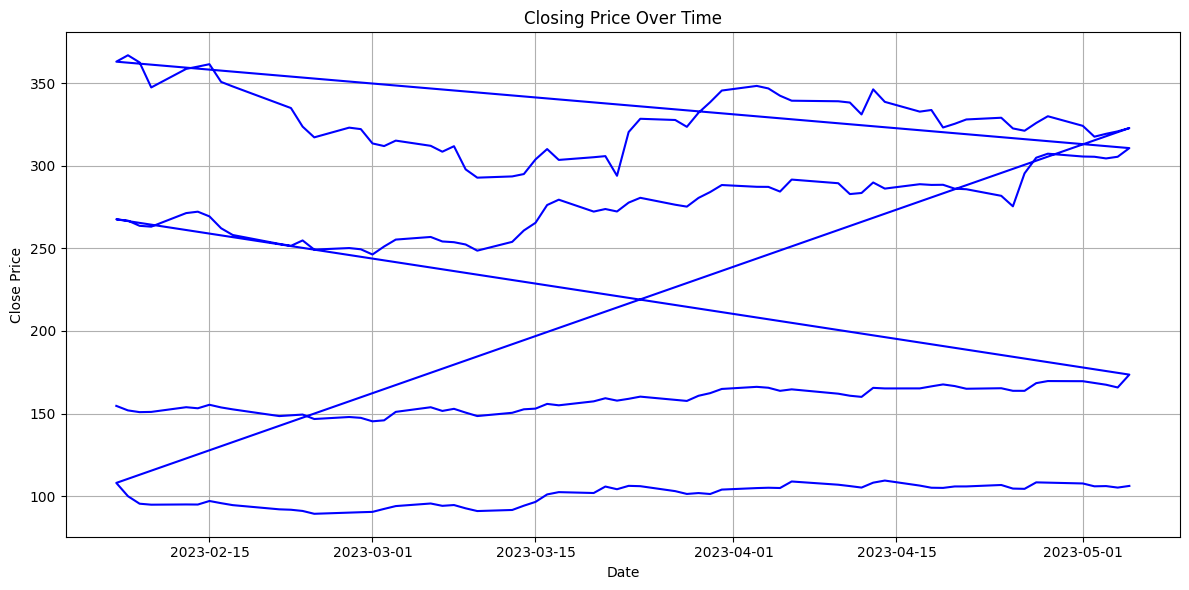

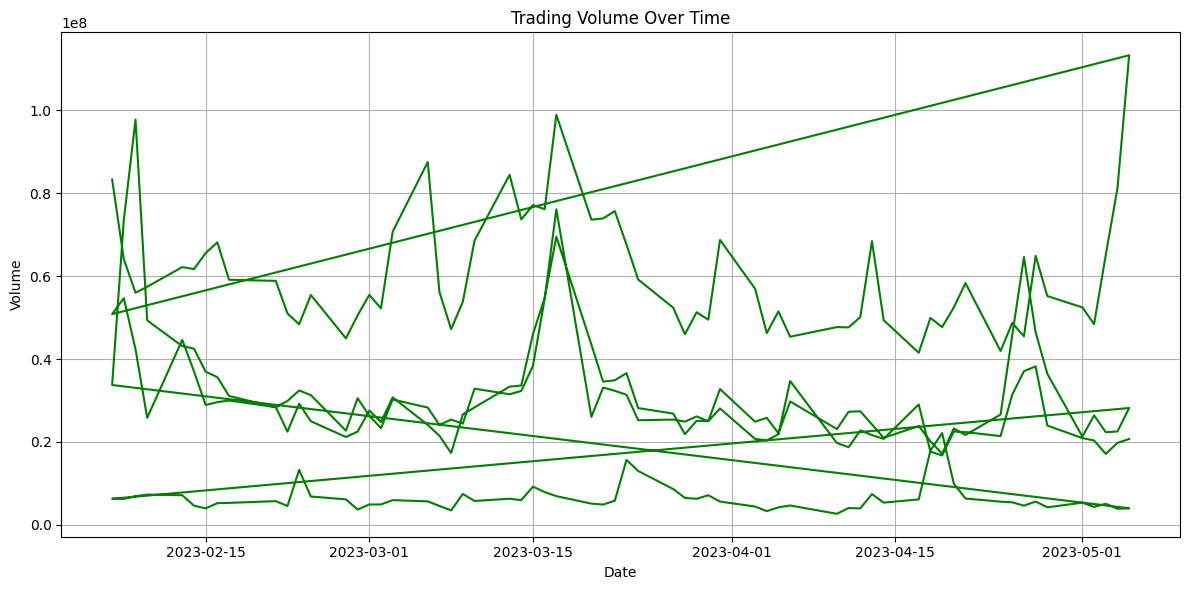

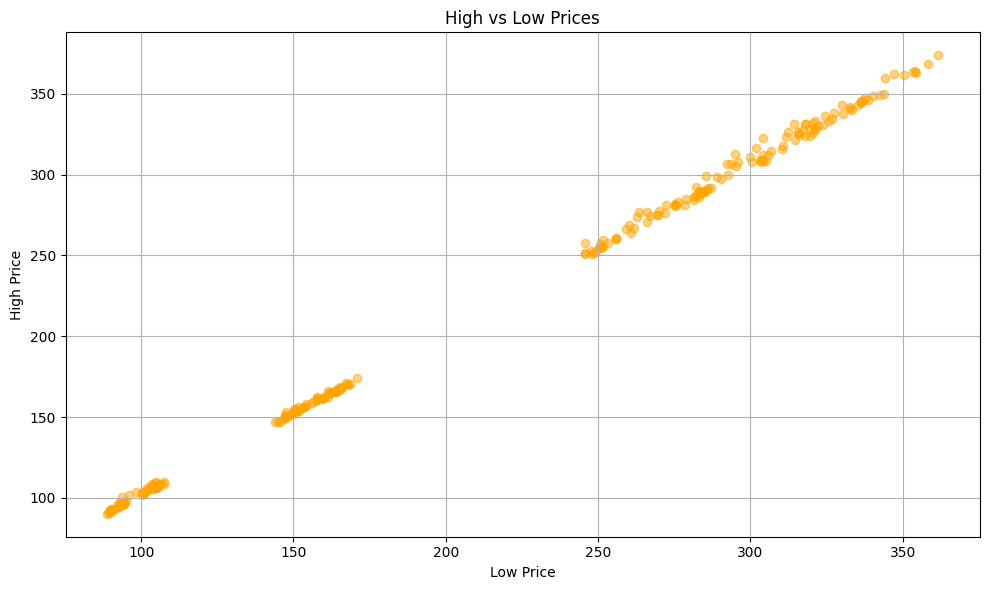

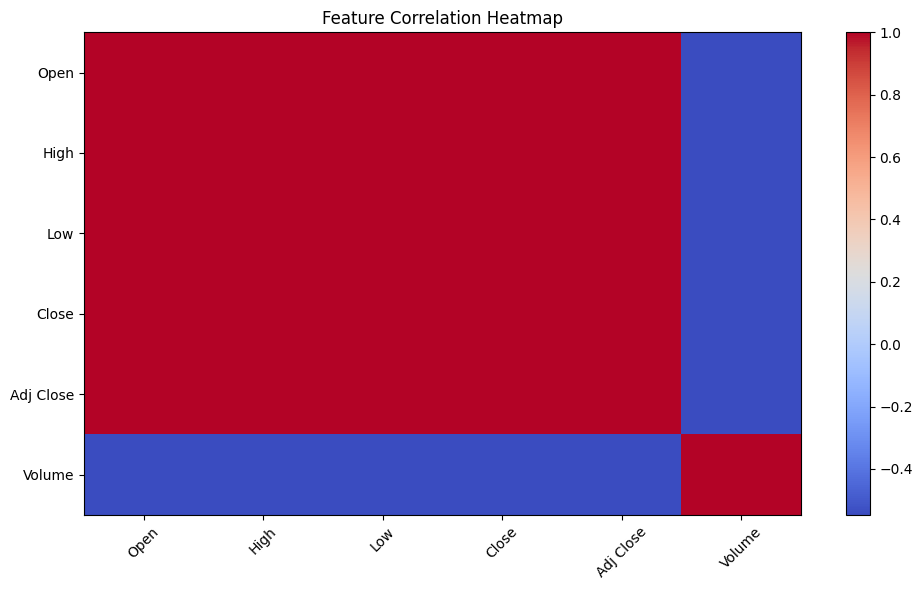

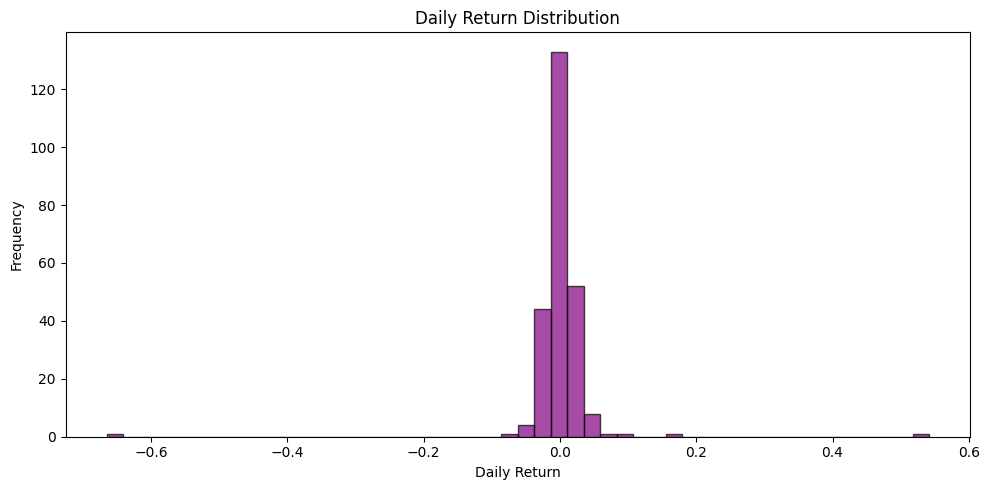

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("C:/Users/PRIYANUJ BHOWMICK/Downloads/stocks.csv")

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot 1: Closing Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Volume Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='green')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: High vs Low Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Low'], df['High'], alpha=0.5, color='orange')
plt.title('High vs Low Prices')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 4: Correlation Heatmap
import numpy as np
correlation = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

plt.figure(figsize=(10, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation)), correlation.columns)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Plot 5: Daily Returns Distribution
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.hist(df['Daily Return'].dropna(), bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
